# Project 8: Markov Simulation -- Data Wrangling

Load all the packages you are going to use.

**Data manipulation and Visualizations**

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import set_config

# to visualize the column transformer and pipeline
set_config(display='diagram')

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

# 1. Define project goal

In this project, I will write a program that simulates customer behaviour in a supermarket.

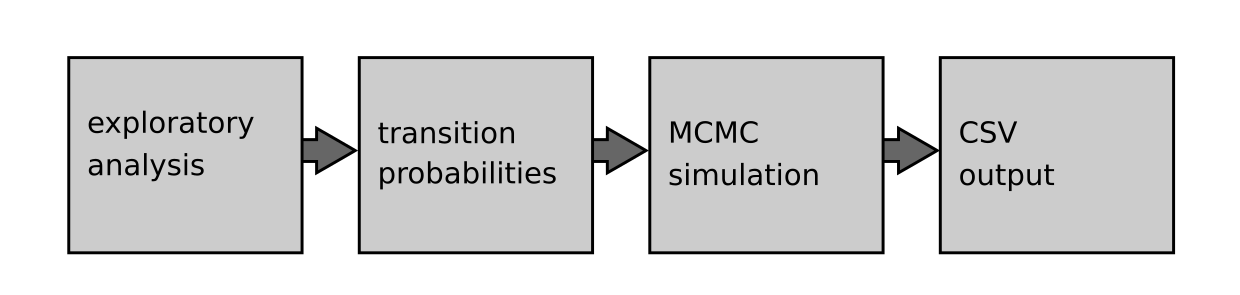

The project involves the following tasks:

1. Explore the data (includes pandas wrangling)

2. Calculate transition probabilities (a 5x5 matrix)

3. Implement a customer class

4. Run a MCMC simulation for a single customer

5. Extend the simulation to multiple customers

# 2. Data wrangling

At the DOODL Supermarket chain they would like to understand their customers better in order to optimize the layout, staffing and service of our supermarkets.They would like me and my team to model the way customers move through a representative shop. 

Their main business goals are:

    understand customer behavior

    explain customer behavior to their non-data staff

    optimize staffing so that the queues do not get unnecessary long

They are using the following model supermarket with six areas: entrance, fruit, spices, dairy, drinks and checkout.

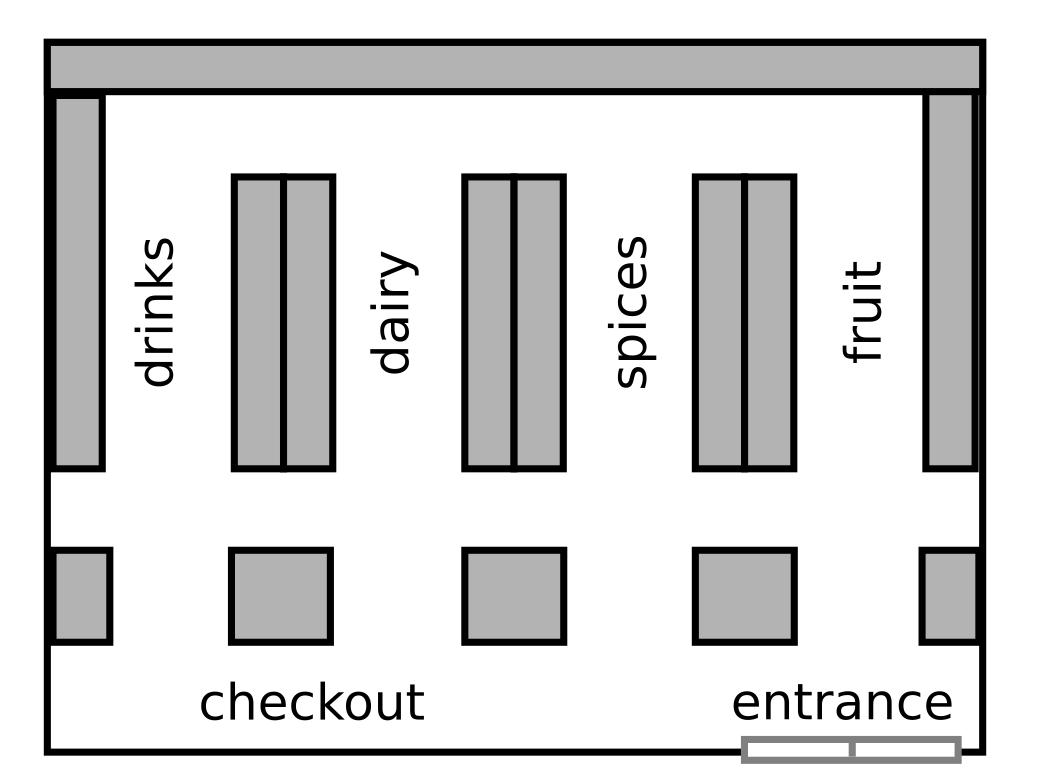

The customers can move between these areas freely. Sooner or later, they will enter the checkout area. Once they do, they are considered to have left the shop.

The movement of all DOODL customers during a five-day week is anonymously tracked. 
In the following files there are tabular data, which indicate 
where customers spent their time. 
The data is complete.


                monday.csv ł tuesday.csv ł wednesday.csv ł thursday.csv ł friday.csv


## Load the data

Write a function to read all the files at once.

In [2]:
def load_data():
    
    """
    
    This fuction reads as DataFrames all .csv files in data directory, 
    appends them in a list, concats them in a single DataFrame, 
    sorts it by time and returns it.
    
    """
    df_list = []
    for file in os.listdir("data/"):
        if file.endswith(".csv"):
            df = pd.read_csv(f"data/{file}", sep = ";", index_col = 0, parse_dates = True)
            df_list.append(df)

    df = pd.concat(df_list)
    df.sort_values(by = "timestamp", inplace = True)
    return df

In [3]:
df = load_data()

In [4]:
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [5]:
df.shape

(24877, 2)

In [6]:
df.columns

Index(['customer_no', 'location'], dtype='object')

In [7]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
dtypes: int64(1), object(1)
memory usage: 583.1+ KB


## Create time-related features

Extract time information.

In [9]:
df["time"] = df.index.time

Extract day information.

In [10]:
df["weekday"] = df.index.weekday

Extract date information.

In [11]:
df["date"] = df.index.date

Extract hour information.

In [12]:
df["hour"] = df.index.hour


Extract minute information.

In [13]:
df["minute"] = df.index.minute


In [14]:
df.head()

,customer_no,location,time,weekday,date,hour,minute
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,0,2019-09-02,7,3
2019-09-02 07:03:00,2,dairy,07:03:00,0,2019-09-02,7,3
2019-09-02 07:04:00,3,dairy,07:04:00,0,2019-09-02,7,4
2019-09-02 07:04:00,4,dairy,07:04:00,0,2019-09-02,7,4
2019-09-02 07:04:00,5,spices,07:04:00,0,2019-09-02,7,4


## Create a unique customer id

In [15]:
df["weekday"].nunique()

5

In [16]:
df["customer_id"] = df["weekday"].astype(str) + "_" + df["customer_no"].astype(str)

In [17]:
df["customer_id"].nunique()

7445

In [18]:
df.head()

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,2,dairy,07:03:00,0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,3,dairy,07:04:00,0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,4,dairy,07:04:00,0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,5,spices,07:04:00,0,2019-09-02,7,4,0_5


## Add missing checkout values

Find the closing time of the supermarket on Monday.

In [19]:
closing_time = df.index.max().time()

In [20]:
print(closing_time)

21:50:00


Define a function for adding the missing values to checkout customers at the closing time.

In [21]:
def missing_checkout(df):
    
    ids =df["customer_id"].unique()
    for id in ids:
        ids_df = df[df["customer_id"] == id]
        
        if "checkout" in ids_df["location"].values:
            pass
        
        else:
            checkout_dict = {"customer_id" : id, "location" : "checkout", 
                             "time" : closing_time, "hour" : 21, "minute": 50}
            
            print(id)
            df = df.append(checkout_dict, ignore_index = True)
    
    return df

In [22]:
df = missing_checkout(df)

0_1430
0_1433
0_1437
0_1439
0_1440
0_1441
0_1443
0_1445
0_1446
0_1447


/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

1_1411
1_1422


/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)


2_1520
2_1527
2_1529
2_1528
2_1530


/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

3_1527
3_1532
3_1533


/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)


4_1494
4_1496
4_1500
4_1503
4_1505
4_1506
4_1510
4_1509


/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_22976/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

Check for missng values.

In [23]:
df.isna().sum()

customer_no    28
location        0
time            0
weekday        28
date           28
hour            0
minute          0
customer_id     0
dtype: int64

Fill missing values using forward fill method.

In [24]:
df = df.sort_values(by = ["customer_id", "time"]).fillna(method = "ffill")

In [25]:
df.head()

,customer_no,location,time,weekday,date,hour,minute,customer_id
0,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
8,1.0,checkout,07:05:00,0.0,2019-09-02,7,5,0_1
19,10.0,fruit,07:06:00,0.0,2019-09-02,7,6,0_10
25,10.0,checkout,07:08:00,0.0,2019-09-02,7,8,0_10
304,100.0,drinks,07:56:00,0.0,2019-09-02,7,56,0_100


In [26]:
df.isna().sum()

customer_no    0
location       0
time           0
weekday        0
date           0
hour           0
minute         0
customer_id    0
dtype: int64

## Timestamp as index

Reconstuct timestamp and set it as index.

In [27]:
df["timestamp"] = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str))

In [28]:
df.head(1)

,customer_no,location,time,weekday,date,hour,minute,customer_id,timestamp
0,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1,2019-09-02 07:03:00


In [29]:
df = df.set_index(["timestamp"])

In [30]:
df.head(1)

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1


In [31]:
df = df.sort_values(by = ["timestamp", "customer_id"])

In [32]:
df.head(20)

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,2.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,3.0,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,4.0,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,5.0,spices,07:04:00,0.0,2019-09-02,7,4,0_5
2019-09-02 07:04:00,6.0,spices,07:04:00,0.0,2019-09-02,7,4,0_6
2019-09-02 07:04:00,7.0,spices,07:04:00,0.0,2019-09-02,7,4,0_7
2019-09-02 07:04:00,8.0,fruit,07:04:00,0.0,2019-09-02,7,4,0_8
2019-09-02 07:05:00,1.0,checkout,07:05:00,0.0,2019-09-02,7,5,0_1


## Drop columns

In [33]:
df = df.drop(["customer_no"], axis = 1)

In [34]:
df

,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,spices,07:04:00,0.0,2019-09-02,7,4,0_5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1508
2019-09-06 21:50:00,drinks,21:50:00,4.0,2019-09-06,21,50,4_1509
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1509


# 3. Data exploration

The sales department is interested in a summary of the collected data. (a report including numbers and diagrams; the audience is not data scientists; insights, which are as clear as possible.) 


They are interested in the following:

I. The total number of customers in each section.

II. The total number of customers in each section over time.

III. The number of customers at checkout over time.

IV. The time each customer spent in the market.

V. The total number of customers in the supermarket over time.

VI. The business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).



## I. Total number of customers in each section

In [35]:
df

,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,spices,07:04:00,0.0,2019-09-02,7,4,0_5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1508
2019-09-06 21:50:00,drinks,21:50:00,4.0,2019-09-06,21,50,4_1509
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1509


Total dataset.

In [53]:
location = df.groupby(["location"])[["customer_id"]].count()

In [54]:
location

,customer_id
location,
checkout,7445
dairy,4679
drinks,3905
fruit,5122
spices,3754


Dataset grouped also by day.

In [59]:
location_d = df.groupby(["weekday", "location"])[["customer_id"]].count()

In [60]:
location_d

customer_id
weekday location             
0.0     checkout         1447
        dairy             895
        drinks            797
        fruit            1005
        spices            750
1.0     checkout         1422
        dairy             911
        drinks            713
        fruit             976
        spices            694
2.0     checkout         1531
        dairy             976
        drinks            775
        fruit            1043
        spices            730
3.0     checkout         1535
        dairy             965
        drinks            776
        fruit            1041
        spices            790
4.0     checkout         1510
        dairy             932
        drinks            844
        fruit            1057
        spices            790

## II. Total number of customers in each section over time

### Plot over time

In [61]:
location_time = df.groupby(["location", "time"])[["customer_id"]].count()
location_time

customer_id
location time                 
checkout 07:01:00            2
         07:02:00            5
         07:03:00            1
         07:04:00            2
         07:05:00            7
...                        ...
spices   21:46:00            3
         21:47:00            1
         21:48:00            4
         21:49:00            3
         21:50:00            1

[4383 rows x 1 columns]

In [62]:
location_time_unstack = location_time.unstack(level = 0)
location_time_unstack

customer_id                          
location    checkout dairy drinks fruit spices
time                                          
07:00:00         NaN   3.0    3.0   4.0    NaN
07:01:00         2.0   4.0    1.0   1.0    1.0
07:02:00         5.0   1.0    1.0   1.0    1.0
07:03:00         1.0   8.0    2.0   3.0    2.0
07:04:00         2.0   5.0    1.0   2.0    4.0
...              ...   ...    ...   ...    ...
21:46:00         5.0   1.0    5.0   6.0    3.0
21:47:00         5.0   5.0    1.0   5.0    1.0
21:48:00         7.0   7.0    2.0   3.0    4.0
21:49:00         6.0   5.0    1.0   3.0    3.0
21:50:00        30.0   3.0    1.0   2.0    1.0

[891 rows x 5 columns]

<AxesSubplot:title={'center':'Total number of customers in each section over time for all days of the week'}, xlabel='time', ylabel='Number of customers'>

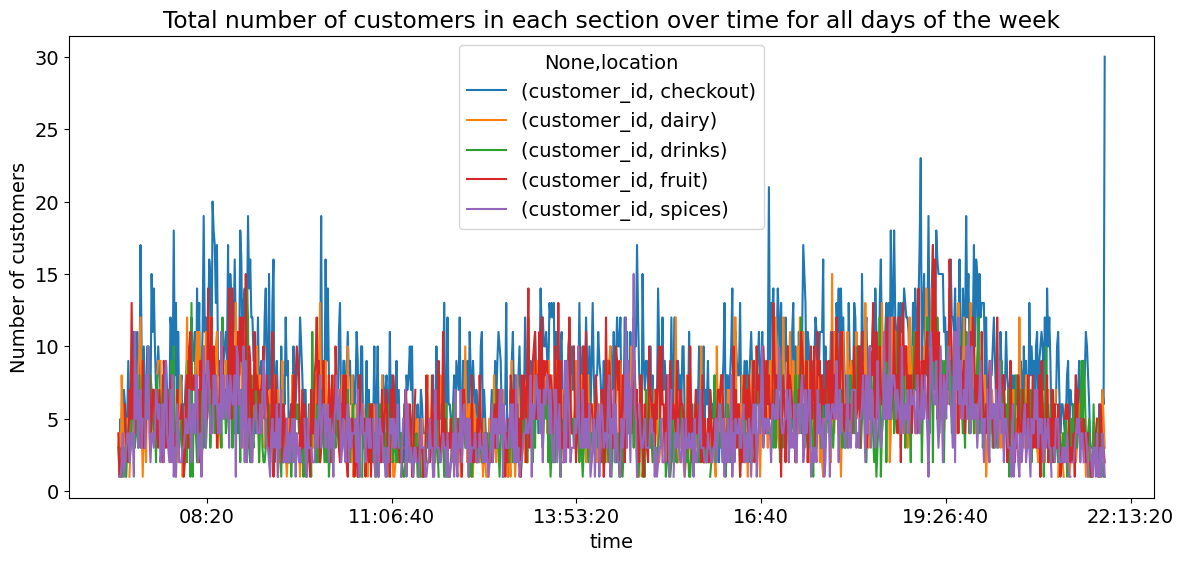

In [63]:
location_time_unstack.plot(kind =  "line", title = "Total number of customers in each section over time for all days of the week", 
                                 ylabel = "Number of customers")

### Plot over hour

In [64]:
location_hour = df.groupby(["location", "hour"])[["customer_id"]].count()
location_hour

customer_id
location hour             
checkout 7             454
         8             677
         9             455
         10            427
         11            342
...                    ...
spices   17            269
         18            346
         19            389
         20            246
         21            122

[75 rows x 1 columns]

In [65]:
location_hour_unstack = location_hour.unstack(level = 0)
location_hour_unstack

customer_id                          
location    checkout dairy drinks fruit spices
hour                                          
7                454   275    278   299    238
8                677   455    348   468    342
9                455   291    231   336    207
10               427   294    198   270    242
11               342   210    150   244    165
12               384   225    188   247    208
13               514   340    238   389    273
14               496   319    229   345    261
15               412   233    190   316    184
16               518   337    272   353    262
17               556   360    294   410    269
18               630   425    361   453    346
19               755   466    441   507    389
20               492   298    307   312    246
21               333   151    180   173    122

<AxesSubplot:title={'center':'Total number of customers in each section over time (per hour) for all days of the week'}, xlabel='hour', ylabel='Number of customers'>

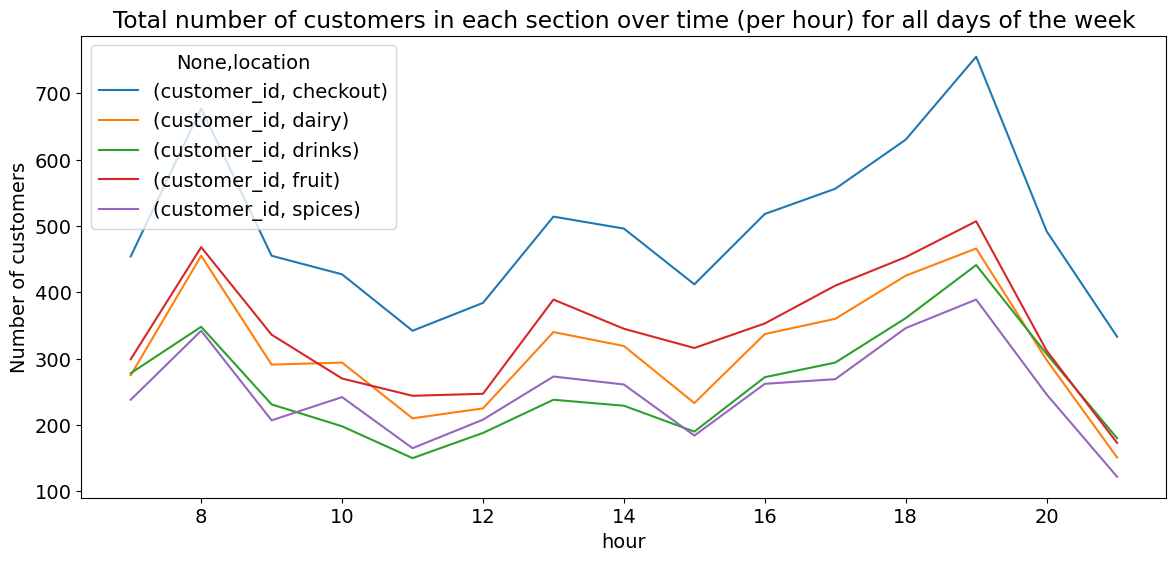

In [66]:
location_hour_unstack.plot(kind =  "line", title = "Total number of customers in each section over time (per hour) for all days of the week", 
                                 ylabel = "Number of customers")

## III. The number of customers at checkout over time

In [67]:
checkout = df.groupby(["location", "hour", "weekday"])[["customer_id"]].count()
checkout

customer_id
location hour weekday             
checkout 7    0.0               92
              1.0               91
              2.0               85
              3.0               99
              4.0               87
...                            ...
spices   21   0.0               18
              1.0               27
              2.0               22
              3.0               35
              4.0               20

[375 rows x 1 columns]

In [68]:
checkout_unstack = checkout.unstack()
checkout_unstack

customer_id                    
weekday               0.0  1.0  2.0  3.0  4.0
location hour                                
checkout 7             92   91   85   99   87
         8            112  129  165  139  132
         9             85   77  106  105   82
         10            90   81   85   91   80
         11            55   47   88   73   79
...                   ...  ...  ...  ...  ...
spices   17            50   60   38   56   65
         18            70   58   46   74   98
         19            59   62  102  101   65
         20            52   52   35   53   54
         21            18   27   22   35   20

[75 rows x 5 columns]

In [69]:
checkout_unstack.loc["checkout"]

customer_id                    
weekday         0.0  1.0  2.0  3.0  4.0
hour                                   
7                92   91   85   99   87
8               112  129  165  139  132
9                85   77  106  105   82
10               90   81   85   91   80
11               55   47   88   73   79
12               73   60   89   72   90
13              120  104  102   80  108
14               90  110  105   83  108
15               94   72   79   86   81
16               86  118   94  118  102
17              122  109   98  112  115
18              128  134   97  123  148
19              129  127  192  172  135
20              109   99   85   96  103
21               62   64   61   86   60

<AxesSubplot:title={'center':'Total number of customers in each section over opening hours for all days of the week'}, xlabel='hour', ylabel='Number of customers'>

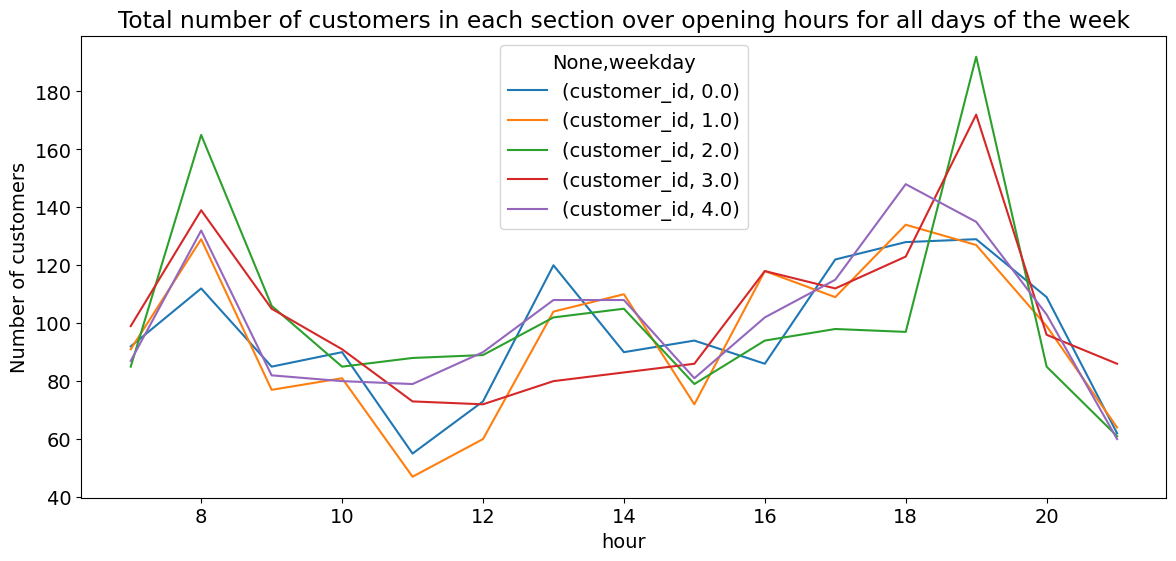

In [71]:
checkout_unstack.loc["checkout"].plot(kind =  "line", title = "Total number of customers in each section over opening hours for all days of the week", 
                                 ylabel = "Number of customers")

## IV. The time each customer spent in the market

In [74]:
df.head()

,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,spices,07:04:00,0.0,2019-09-02,7,4,0_5


Create a new dataframe and reset the index.

In [72]:
df2 = df.reset_index()

In [73]:
df2.head()

,timestamp,location,time,weekday,date,hour,minute,customer_id
0,2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
1,2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2,2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
3,2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
4,2019-09-02 07:04:00,spices,07:04:00,0.0,2019-09-02,7,4,0_5


Extract the duration of customers' presence in the supermarket.

In [75]:
time_spend = df2.groupby(["weekday", "customer_id"])["timestamp"].agg(["max", "min"])

In [76]:
time_spend

max                 min
weekday customer_id                                        
0.0     0_1         2019-09-02 07:05:00 2019-09-02 07:03:00
        0_10        2019-09-02 07:08:00 2019-09-02 07:06:00
        0_100       2019-09-02 08:03:00 2019-09-02 07:56:00
        0_1000      2019-09-02 17:51:00 2019-09-02 17:44:00
        0_1001      2019-09-02 17:46:00 2019-09-02 17:45:00
...                                 ...                 ...
4.0     4_995       2019-09-06 17:18:00 2019-09-06 17:17:00
        4_996       2019-09-06 17:23:00 2019-09-06 17:17:00
        4_997       2019-09-06 17:31:00 2019-09-06 17:18:00
        4_998       2019-09-06 17:23:00 2019-09-06 17:18:00
        4_999       2019-09-06 17:27:00 2019-09-06 17:18:00

[7445 rows x 2 columns]

In [77]:
time_spend["duration"] = time_spend["max"] - time_spend["min"]

In [78]:
time_spend.head()

max                 min        duration
weekday customer_id                                                        
0.0     0_1         2019-09-02 07:05:00 2019-09-02 07:03:00 0 days 00:02:00
        0_10        2019-09-02 07:08:00 2019-09-02 07:06:00 0 days 00:02:00
        0_100       2019-09-02 08:03:00 2019-09-02 07:56:00 0 days 00:07:00
        0_1000      2019-09-02 17:51:00 2019-09-02 17:44:00 0 days 00:07:00
        0_1001      2019-09-02 17:46:00 2019-09-02 17:45:00 0 days 00:01:00

In [79]:
time_spend.sort_values(by = ["weekday", "customer_id"], ascending = True)

max                 min        duration
weekday customer_id                                                        
0.0     0_1         2019-09-02 07:05:00 2019-09-02 07:03:00 0 days 00:02:00
        0_10        2019-09-02 07:08:00 2019-09-02 07:06:00 0 days 00:02:00
        0_100       2019-09-02 08:03:00 2019-09-02 07:56:00 0 days 00:07:00
        0_1000      2019-09-02 17:51:00 2019-09-02 17:44:00 0 days 00:07:00
        0_1001      2019-09-02 17:46:00 2019-09-02 17:45:00 0 days 00:01:00
...                                 ...                 ...             ...
4.0     4_995       2019-09-06 17:18:00 2019-09-06 17:17:00 0 days 00:01:00
        4_996       2019-09-06 17:23:00 2019-09-06 17:17:00 0 days 00:06:00
        4_997       2019-09-06 17:31:00 2019-09-06 17:18:00 0 days 00:13:00
        4_998       2019-09-06 17:23:00 2019-09-06 17:18:00 0 days 00:05:00
        4_999       2019-09-06 17:27:00 2019-09-06 17:18:00 0 days 00:09:00

[7445 rows x 3 columns]

## V. The total number of customers in the supermarket over time

In [80]:
customers_total = df.groupby(["weekday", "hour"])[["customer_id"]].count().unstack(level = 0)
customers_total

customer_id                    
weekday         0.0  1.0  2.0  3.0  4.0
hour                                   
7               317  328  279  315  305
8               364  463  547  447  469
9               308  262  373  323  254
10              282  267  283  303  296
11              189  133  287  227  275
12              265  199  271  234  283
13              412  330  358  297  357
14              305  343  344  299  359
15              342  223  246  266  258
16              307  405  310  384  336
17              410  366  305  392  416
18              449  444  319  455  548
19              404  437  674  590  453
20              377  320  290  333  335
21              163  196  169  242  189

<AxesSubplot:title={'center':'Total number of customers in each section over opening hours for all day of the week'}, xlabel='hour', ylabel='Number of customers'>

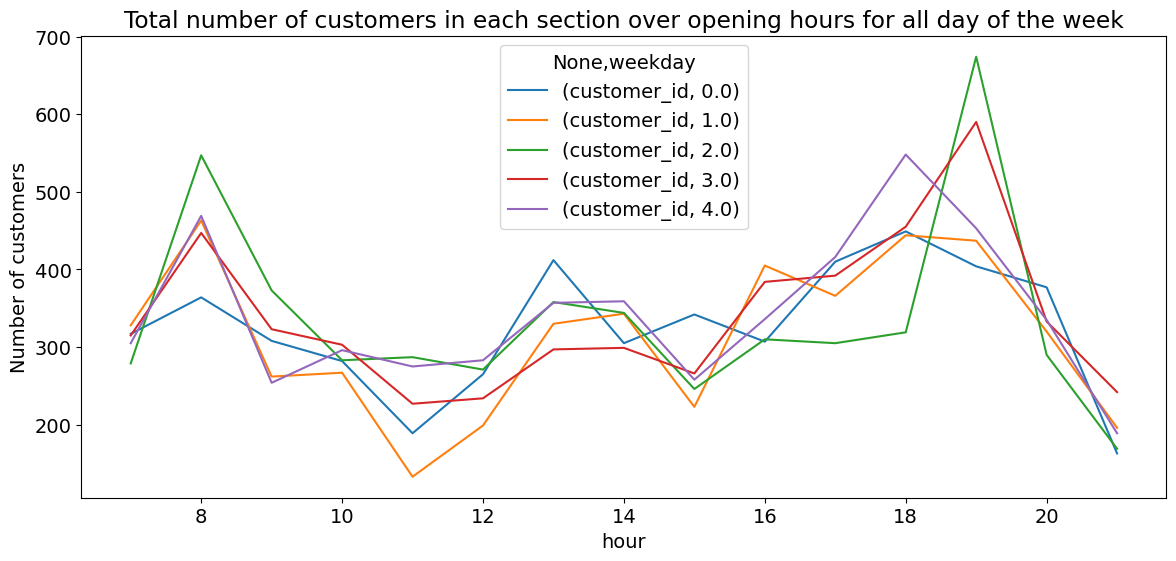

In [81]:
customers_total.plot(kind =  "line", title = "Total number of customers in each section over opening hours for all day of the week", 
                                 ylabel = "Number of customers")

## VI. Plot the distribution of customers of their first visited section versus following sections

In [82]:
df.head(1)

,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1


In [83]:
df.drop(["time", "date", "hour", "minute", "weekday"], axis = 1, inplace = True)

In [84]:
df.head(1)

,location,customer_id
timestamp,,
2019-09-02 07:03:00,dairy,0_1


Sort values by timestamp and customer.

In [85]:
df = df.sort_values(by = ["customer_id", "timestamp"])

In [86]:
df.head()

,location,customer_id
timestamp,,
2019-09-02 07:03:00,dairy,0_1
2019-09-02 07:05:00,checkout,0_1
2019-09-02 07:06:00,fruit,0_10
2019-09-02 07:08:00,checkout,0_10
2019-09-02 07:56:00,drinks,0_100


Resample by minutes and fill the nas.

In [87]:
df = df.groupby(["customer_id"]).resample(rule = "T").last().fillna(method = "ffill")

In [88]:
df.head()

location customer_id
customer_id timestamp                                
0_1         2019-09-02 07:03:00     dairy         0_1
            2019-09-02 07:04:00     dairy         0_1
            2019-09-02 07:05:00  checkout         0_1
0_10        2019-09-02 07:06:00     fruit        0_10
            2019-09-02 07:07:00     fruit        0_10

In [89]:
df.tail()

location customer_id
customer_id timestamp                                
4_999       2019-09-06 17:23:00     fruit       4_999
            2019-09-06 17:24:00    drinks       4_999
            2019-09-06 17:25:00     fruit       4_999
            2019-09-06 17:26:00     fruit       4_999
            2019-09-06 17:27:00  checkout       4_999

In [90]:
df = df.rename(columns = {"location" : "before"})

In [91]:
df["after"] = df["before"]. shift(-1)

In [92]:
df["after"].fillna(method = "ffill", inplace = True)

In [93]:
df_test = df[df["before"] == "checkout"]

In [94]:
for section in df_test["after"]:
    df_test["after"].replace({section : "checkout"}, inplace = True)

/tmp/ipykernel_22976/420175261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["after"].replace({section : "checkout"}, inplace = True)


In [95]:
df_test

,,before,customer_id,after
customer_id,timestamp,,,
0_1,2019-09-02 07:05:00,checkout,0_1,checkout
0_10,2019-09-02 07:08:00,checkout,0_10,checkout
0_100,2019-09-02 08:03:00,checkout,0_100,checkout
0_1000,2019-09-02 17:51:00,checkout,0_1000,checkout
0_1001,2019-09-02 17:46:00,checkout,0_1001,checkout
...,...,...,...,...
4_995,2019-09-06 17:18:00,checkout,4_995,checkout
4_996,2019-09-06 17:23:00,checkout,4_996,checkout
4_997,2019-09-06 17:31:00,checkout,4_997,checkout


In [96]:
df[df["before"] == "checkout"] = df_test

In [97]:
df[df["before"] == "checkout"]

,,before,customer_id,after
customer_id,timestamp,,,
0_1,2019-09-02 07:05:00,checkout,0_1,checkout
0_10,2019-09-02 07:08:00,checkout,0_10,checkout
0_100,2019-09-02 08:03:00,checkout,0_100,checkout
0_1000,2019-09-02 17:51:00,checkout,0_1000,checkout
0_1001,2019-09-02 17:46:00,checkout,0_1001,checkout
...,...,...,...,...
4_995,2019-09-06 17:18:00,checkout,4_995,checkout
4_996,2019-09-06 17:23:00,checkout,4_996,checkout
4_997,2019-09-06 17:31:00,checkout,4_997,checkout


In [98]:
df.head(20)

before customer_id     after
customer_id timestamp                                          
0_1         2019-09-02 07:03:00     dairy         0_1     dairy
            2019-09-02 07:04:00     dairy         0_1  checkout
            2019-09-02 07:05:00  checkout         0_1  checkout
0_10        2019-09-02 07:06:00     fruit        0_10     fruit
            2019-09-02 07:07:00     fruit        0_10  checkout
            2019-09-02 07:08:00  checkout        0_10  checkout
0_100       2019-09-02 07:56:00    drinks       0_100    drinks
            2019-09-02 07:57:00    drinks       0_100    drinks
            2019-09-02 07:58:00    drinks       0_100    drinks
            2019-09-02 07:59:00    drinks       0_100    drinks
            2019-09-02 08:00:00    drinks       0_100    drinks
            2019-09-02 08:01:00    drinks       0_100    drinks
            2019-09-02 08:02:00    drinks       0_100  checkout
            2019-09-02 08:03:00  checkout       0_100  checkout
0_1000      2019-09-02 17:44:00     dairy      0_1000     dairy
            2019-09-02 17:45:00     dairy      0_1000     dairy
            2019-09-02 17:46:00     dairy      0_1000     dairy
            2019-09-02 17:47:00     dairy      0_1000     dairy
            2019-09-02 17:48:00     dairy      0_1000     dairy
            2019-09-02 17:49:00     dairy      0_1000    drinks

In [99]:
transition_frequencies = pd.crosstab(df["before"], df["after"], normalize = 0)
transition_frequencies

after,checkout,dairy,drinks,fruit,spices
before,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103313,0.737023,0.058546,0.049772,0.051347
drinks,0.215630,0.010900,0.598560,0.087918,0.086992
fruit,0.201558,0.095744,0.054834,0.597199,0.050665
spices,0.150526,0.193214,0.163109,0.090953,0.402198


In [100]:
transition_frequencies.sum(axis = 1)

before
checkout    1.0
dairy       1.0
drinks      1.0
fruit       1.0
spices      1.0
dtype: float64

In [101]:
locations = ["checkout", "dairy", "drinks", "fruit", "spices"]

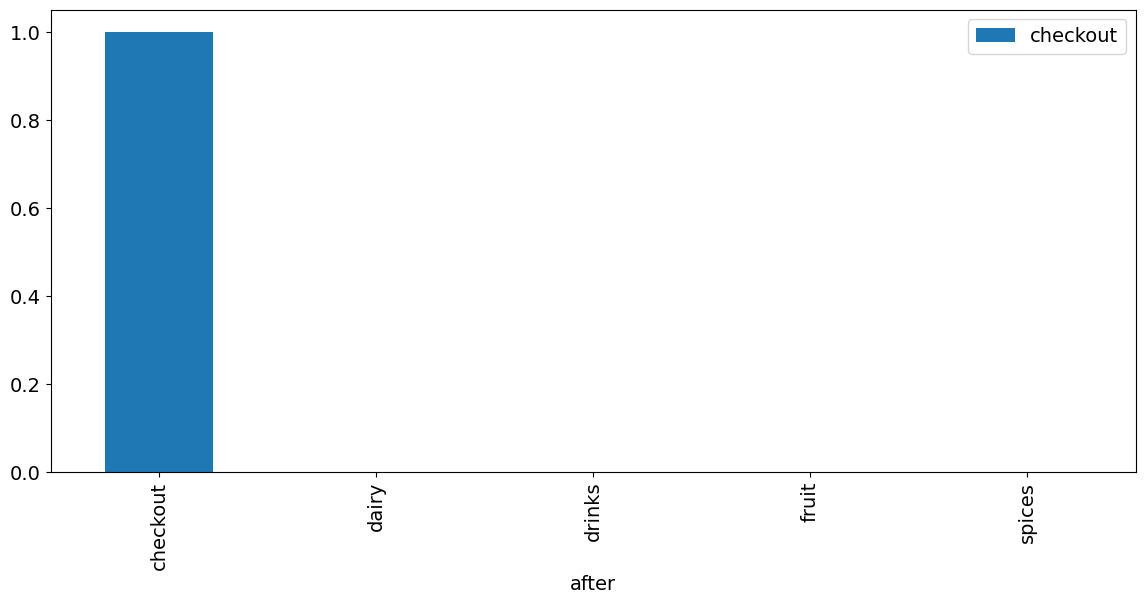

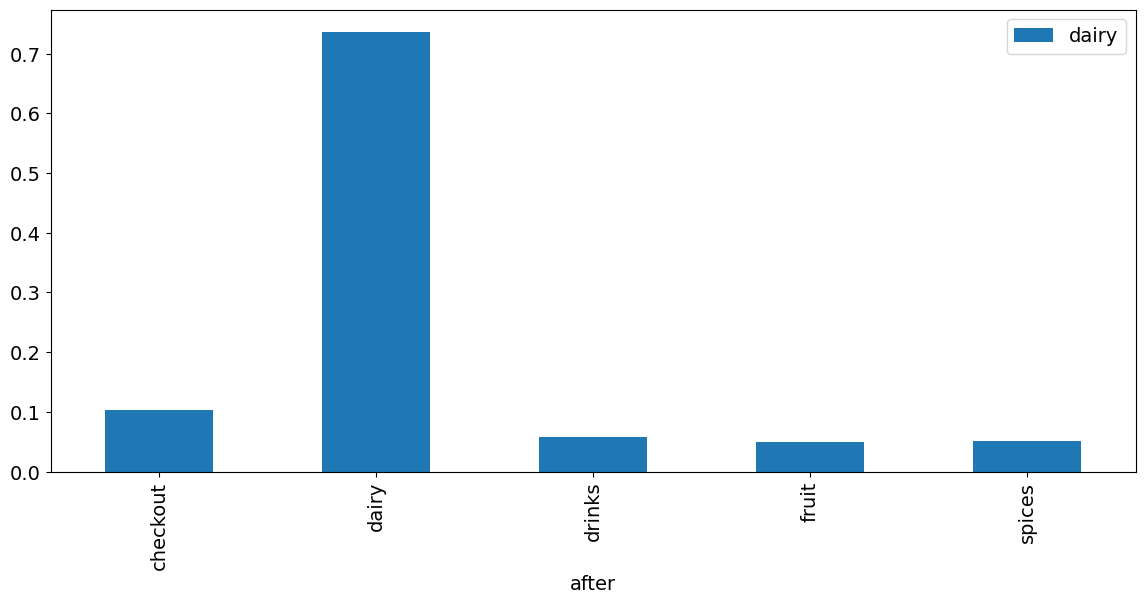

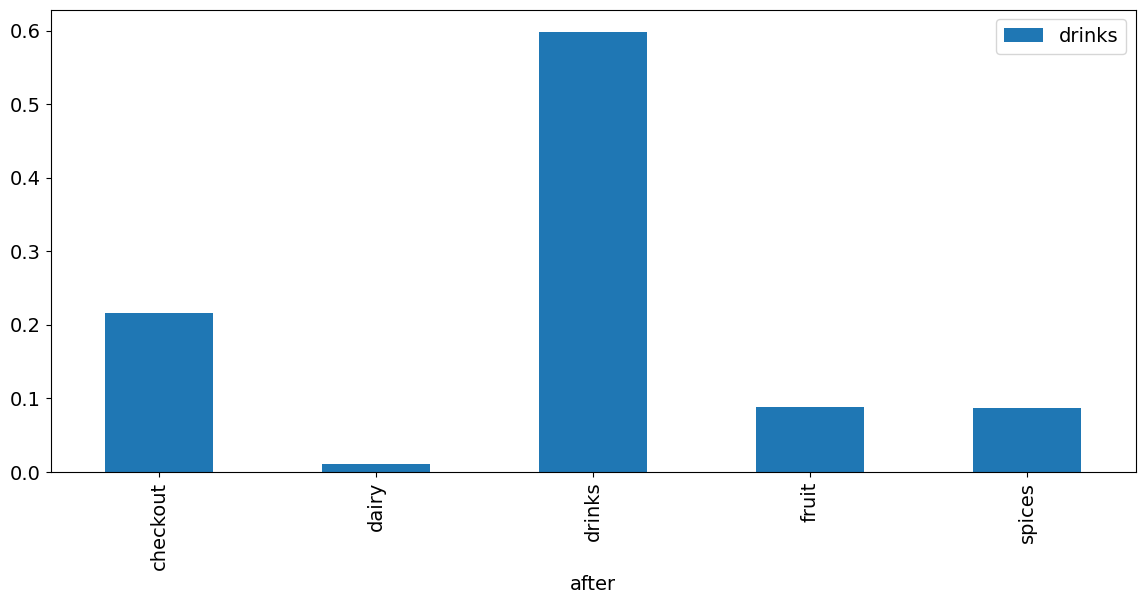

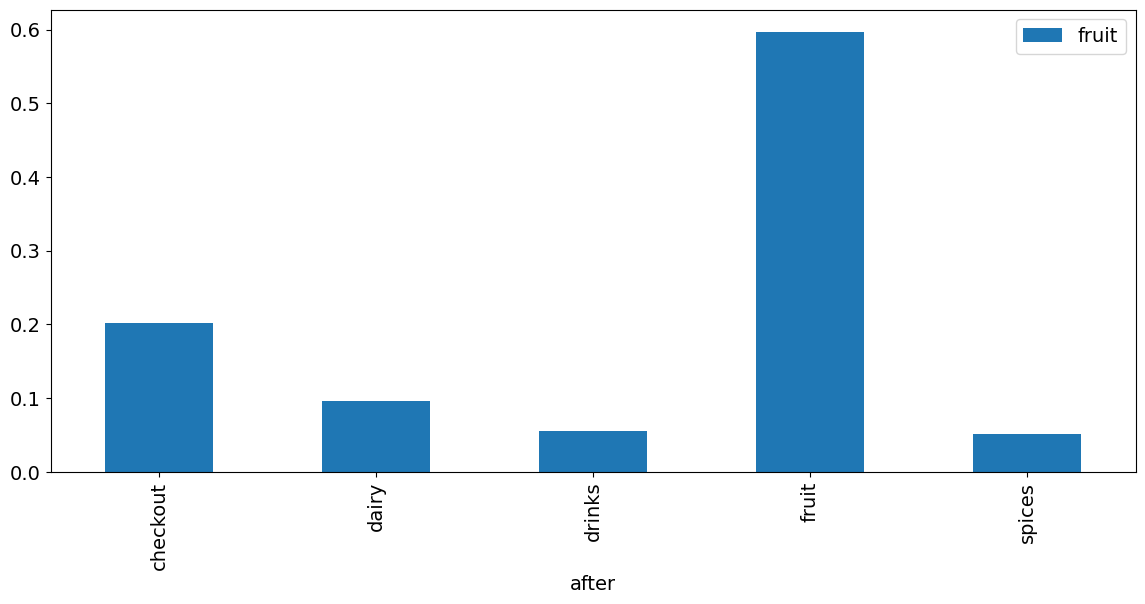

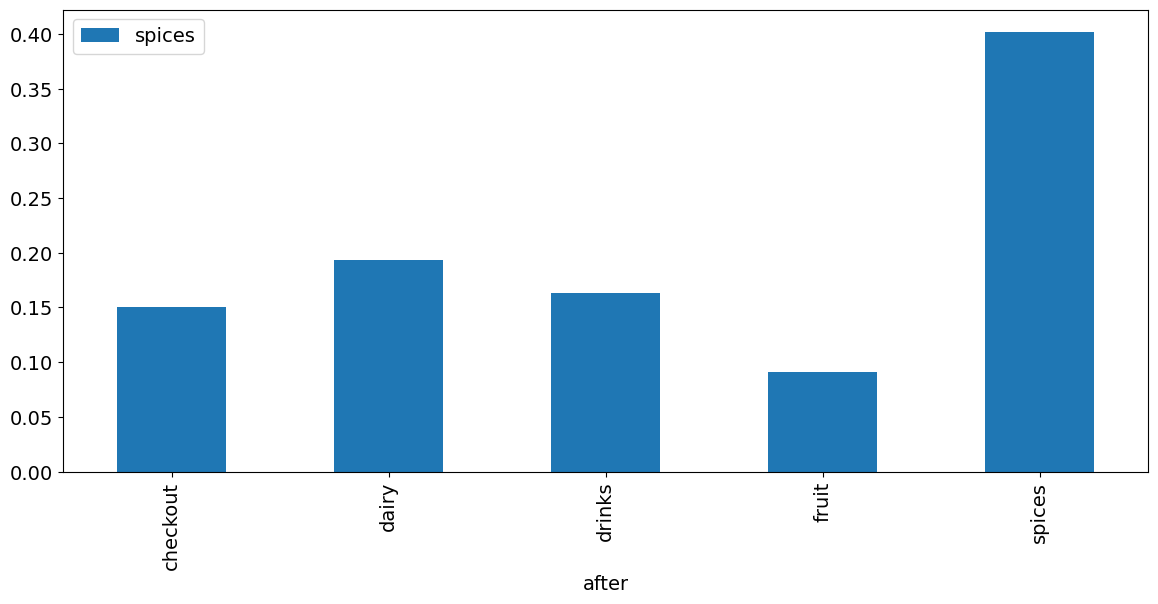

In [103]:
for item in locations:
    plot = pd.DataFrame(transition_frequencies.loc[f"{item}"]).plot(kind = "bar")